# Appendix

In [ ]:
# Helper libraries
import os
import zipfile
import random
import datetime
from packaging import version
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
#from plot_keras_history import plot_history

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.3.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# download dataset
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-10-31 19:32:14--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.33.180.114, 2600:1408:5400:493::e59, 2600:1408:5400:48f::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.33.180.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   227MB/s    in 3.6s    

2020-10-31 19:32:18 (221 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
# print quantity of dogs and cats
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


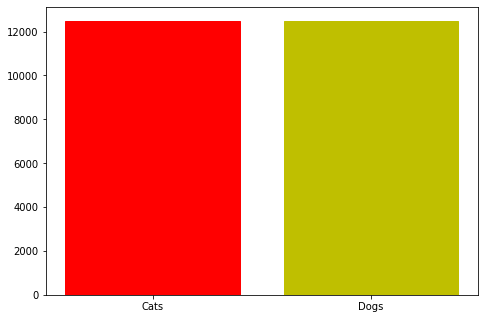

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
CATSNUM = len(os.listdir('/tmp/PetImages/Cat/'))
DOGSNUM = len(os.listdir('/tmp/PetImages/Dog/'))
barlist = ax.bar(['Cats', 'Dogs'], [CATSNUM, DOGSNUM])
barlist[0].set_color('r')
barlist[1].set_color('y')
plt.show()

Text(0.5, 1.0, 'Image Cat Dimensions')

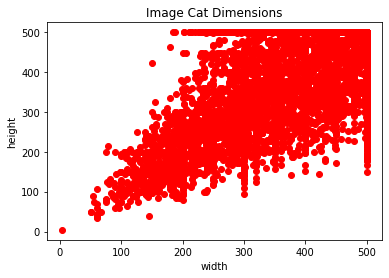

In [ ]:
from PIL import *
for filename in os.listdir('/tmp/PetImages/Cat/'):
  file = '/tmp/PetImages/Cat/' + filename
  try:
    if os.path.getsize(file) > 0: 
      im = Image.open(file)
  except UnidentifiedImageError:
      pass
  except:
      print(filename + " is zero length, so ignoring.")
 
  width, height = im.size
  plt.plot(width, height, 'ro')
plt.xlabel('width')
plt.ylabel('height')
plt.title('Image Cat Dimensions')

Text(0.5, 1.0, 'Image Dog Dimensions')

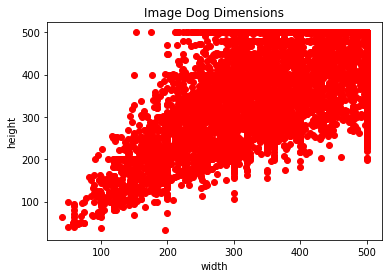

In [ ]:
for filename in os.listdir('/tmp/PetImages/Dog/'):
  file = '/tmp/PetImages/Dog/' + filename
  try:
    if os.path.getsize(file) > 0: 
      im = Image.open(file)
  except UnidentifiedImageError:
      pass
  except:
      print(filename + " is zero length, so ignoring.")
 
  width, height = im.size
  plt.plot(width, height, 'ro')
plt.xlabel('width')
plt.ylabel('height')
plt.title('Image Dog Dimensions')

In [ ]:

try:
    os.mkdir('/tmp/cats_v_dogs')
    os.mkdir('/tmp/cats_v_dogs/training')
    os.mkdir('/tmp/cats_v_dogs/testing')
    os.mkdir('/tmp/cats_v_dogs/training/cats')
    os.mkdir('/tmp/cats_v_dogs/training/dogs')
    os.mkdir('/tmp/cats_v_dogs/testing/cats')
    os.mkdir('/tmp/cats_v_dogs/testing/dogs')
except OSError:
    pass


In [ ]:

print(os.listdir('/tmp/cats_v_dogs/training/cats'))

[]


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
TRAINING_CATS_DIR = '/tmp/cats_v_dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats_v_dogs/testing/cats/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
TRAINING_DOGS_DIR = '/tmp/cats_v_dogs/training/dogs/'
TESTING_DOGS_DIR = '/tmp/cats_v_dogs/testing/dogs/'

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:

print(len(os.listdir('/tmp/cats_v_dogs/training/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats_v_dogs/testing/dogs/')))

11250
11250
1250
1250


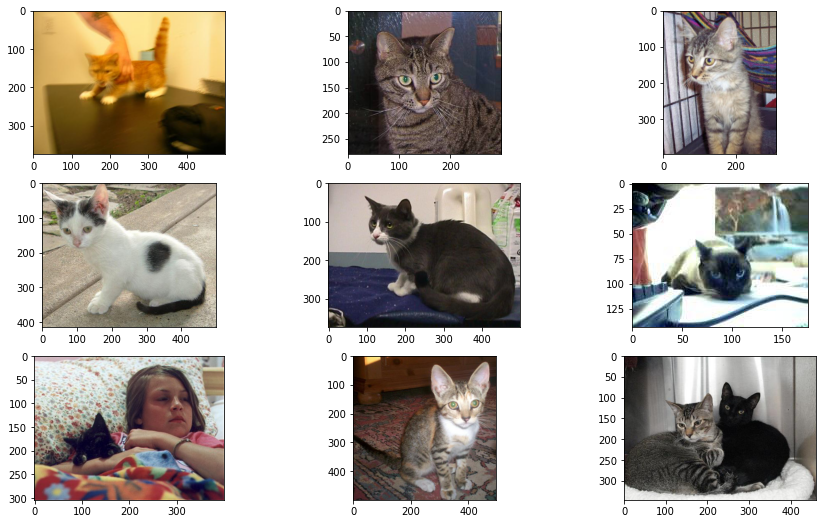

In [ ]:
fig = plt.figure(figsize = (15, 9))
Catfolder = '/tmp/PetImages/Cat/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Catfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

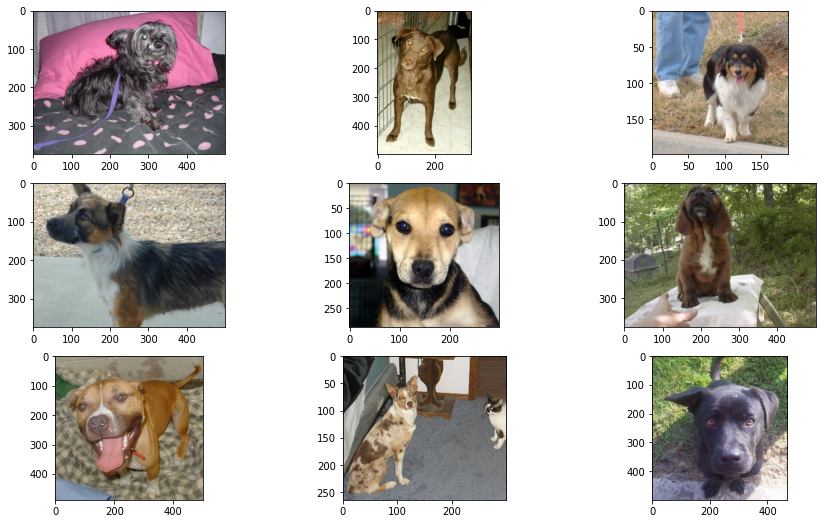

In [ ]:
fig = plt.figure(figsize = (15, 9))
Dogfolder = '/tmp/PetImages/Dog/'
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# define filename
    filename = Dogfolder + str(i) + '.jpg'
# load image pixels
    image = imread(filename)
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

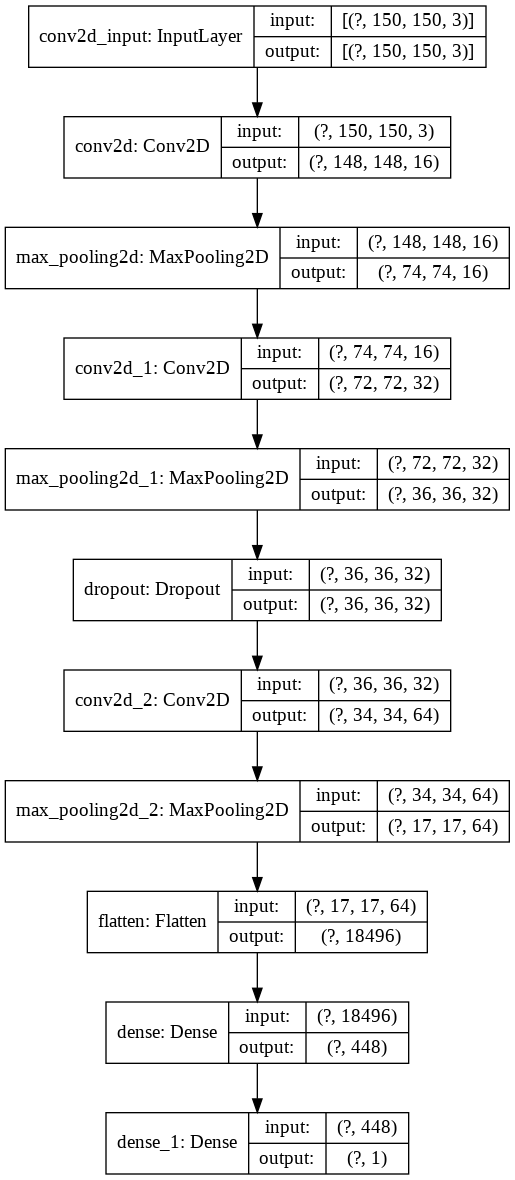

In [ ]:
keras.utils.plot_model(model, "MCVD_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
TRAINING_DIR = "/tmp/cats_v_dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats_v_dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                   )

Epoch 1/10
90/90 [==============================] - 74s 820ms/step - loss: 0.6650 - acc: 0.6094 - val_loss: 0.6022 - val_acc: 0.6760
Epoch 2/10
90/90 [==============================] - 73s 809ms/step - loss: 0.5489 - acc: 0.7169 - val_loss: 0.5151 - val_acc: 0.7440
Epoch 3/10
90/90 [==============================] - 73s 811ms/step - loss: 0.4903 - acc: 0.7604 - val_loss: 0.4898 - val_acc: 0.7607
Epoch 4/10
90/90 [==============================] - 73s 808ms/step - loss: 0.4453 - acc: 0.7884 - val_loss: 0.4567 - val_acc: 0.7707
Epoch 5/10
90/90 [==============================] - 72s 801ms/step - loss: 0.4060 - acc: 0.8128 - val_loss: 0.4632 - val_acc: 0.7727
Epoch 6/10
90/90 [==============================] - 72s 801ms/step - loss: 0.3662 - acc: 0.8378 - val_loss: 0.4490 - val_acc: 0.7813
Epoch 7/10
90/90 [==============================] - 72s 800ms/step - loss: 0.3308 - acc: 0.8559 - val_loss: 0.4102 - val_acc: 0.8013
Epoch 8/10
90/90 [==============================] - 72s 801ms/step - 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

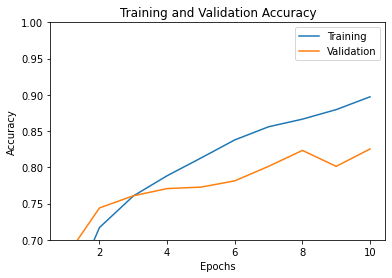

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

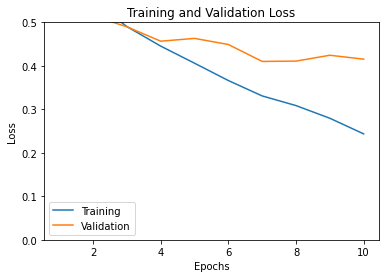

In [ ]:
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 0.5])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(validation_generator, validation_generator)

In [ ]:
print('shape of preds: ', predictions.shape)

shape of preds:  (2500, 1)


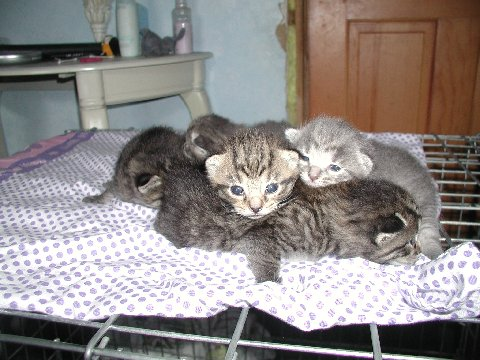

/tmp/PetImages/Cat/2021.jpg


In [ ]:
listOfImageNames = ["/tmp/PetImages/Cat/2021.jpg"]
for imageName in listOfImageNames:
    display(Image.open(imageName))
    print(imageName)

In [ ]:
predictions[2021]

array([0.62], dtype=float32)

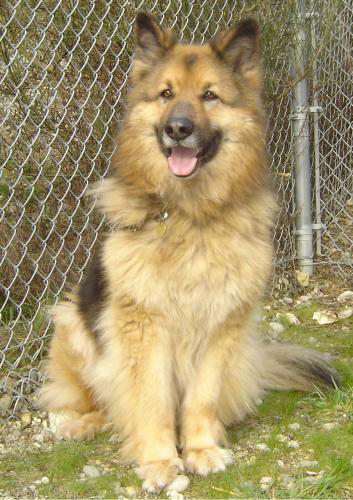

/tmp/PetImages/Dog/2020.jpg


In [ ]:
listOfImageNames = ["/tmp/PetImages/Dog/2020.jpg"]
for imageName in listOfImageNames:
    display(Image.open(imageName))
    print(imageName)

In [ ]:
predictions[2020]

array([0.949], dtype=float32)

# MODEL 2 

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model2.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                   )

Epoch 1/10
90/90 [==============================] - 73s 814ms/step - loss: 0.7922 - acc: 0.5504 - val_loss: 0.6831 - val_acc: 0.5273
Epoch 2/10
90/90 [==============================] - 73s 806ms/step - loss: 0.5968 - acc: 0.6815 - val_loss: 0.6200 - val_acc: 0.6660
Epoch 3/10
90/90 [==============================] - 72s 803ms/step - loss: 0.5142 - acc: 0.7472 - val_loss: 0.5332 - val_acc: 0.7320
Epoch 4/10
90/90 [==============================] - 72s 797ms/step - loss: 0.4794 - acc: 0.7640 - val_loss: 0.4969 - val_acc: 0.7493
Epoch 5/10
90/90 [==============================] - 71s 790ms/step - loss: 0.4503 - acc: 0.7847 - val_loss: 0.5071 - val_acc: 0.7453
Epoch 6/10
90/90 [==============================] - 71s 790ms/step - loss: 0.4211 - acc: 0.8038 - val_loss: 0.4834 - val_acc: 0.7693
Epoch 7/10
90/90 [==============================] - 71s 786ms/step - loss: 0.3889 - acc: 0.8217 - val_loss: 0.4356 - val_acc: 0.7833
Epoch 8/10
90/90 [==============================] - 70s 783ms/step - 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

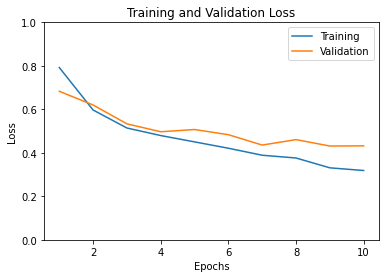

In [ ]:
plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
plt.ylim([0.0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model2.predict(validation_generator, validation_generator)

In [ ]:
predictions[2021]

array([0.012], dtype=float32)

In [ ]:
predictions[2020]

array([0.044], dtype=float32)

# MODEL 3

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model3.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                   )

Epoch 1/10
90/90 [==============================] - 72s 800ms/step - loss: 0.8538 - acc: 0.5531 - val_loss: 0.6643 - val_acc: 0.5667
Epoch 2/10
55/90 [=================>............] - ETA: 25s - loss: 0.6017 - acc: 0.6763

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MODEL 4

In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model4.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)]
                   )

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MODEL 5

In [ ]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model4.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                   )

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MODEL 6

In [ ]:
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model6.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=4)]
                   )

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MODEL 7

In [ ]:
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(448, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model7.fit(train_generator, epochs=10
                    ,validation_data=validation_generator
                    ,validation_steps=6
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=4)]
                   )

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
plt.ylim([0.7, 1.0])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()